In [2]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [3]:
#foi necessario encoding='latin-1' pois estava dando erro de encoding
data = pd.read_csv('data/Meningite_UF_FaixaEtaria.csv', sep = ";", encoding='latin-1')
data.head()

,UF de notificação,Em branco/IGN,<1 Ano,01/abr,05/set,out/14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total
0,11 Rondônia,-,95.0,92.0,100.0,70.0,64.0,194.0,125.0,16.0,15.0,8,2,781.0
1,12 Acre,1,49.0,17.0,28.0,30.0,28.0,66.0,26.0,4.0,1.0,2,1,253.0
2,13 Amazonas,-,178.0,127.0,188.0,174.0,170.0,616.0,333.0,25.0,20.0,13,4,1848.0
3,14 Roraima,-,36.0,14.0,11.0,16.0,15.0,65.0,39.0,3.0,2.0,2,1,204.0
4,15 Pará,6,515.0,381.0,486.0,572.0,426.0,1559.0,666.0,62.0,43.0,31,9,4756.0


In [4]:
por_uf = data.groupby('UF de notificação').sum()['Total'].sort_values(ascending=False)
por_uf.head(6)

UF de notificação
Total                   204509.0
35 São Paulo             82189.0
41 Paraná                16647.0
43 Rio Grande do Sul     14522.0
33 Rio de Janeiro        12926.0
31 Minas Gerais          12135.0
Name: Total, dtype: float64

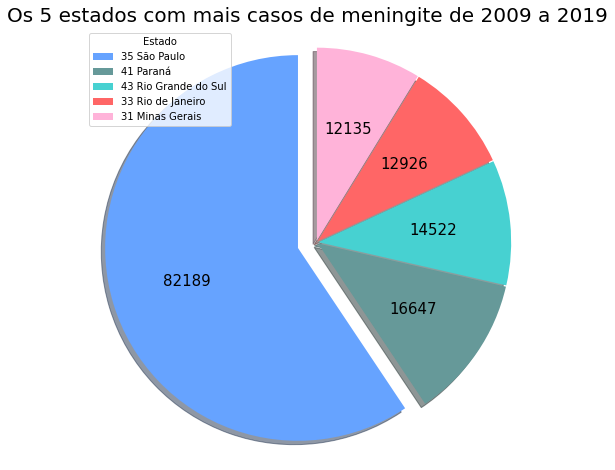

In [5]:
labels = por_uf.loc['35 São Paulo':'31 Minas Gerais'].index
values = por_uf.loc['35 São Paulo':'31 Minas Gerais'].values


#para que o gráfico apresente os valores sem porcentagem
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

explode = (0.1,0.01,0.01,0.01,0.01)
c = ['#66a3ff', '#669999', '#47d1d1', '#ff6666', '#ffb3d9']
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(values, explode=explode, shadow=True, autopct = autopct_format(values), 
        startangle=90, colors=c, textprops={'fontsize': 15})
ax1.axis('equal')
plt.legend(labels,loc='best', title='Estado')
plt.title('Os 5 estados com mais casos de meningite de 2009 a 2019', fontsize=20)
plt.show()

In [11]:
por_idade = data.groupby('UF de notificação').sum()['<1 Ano'].sort_values(ascending=False)

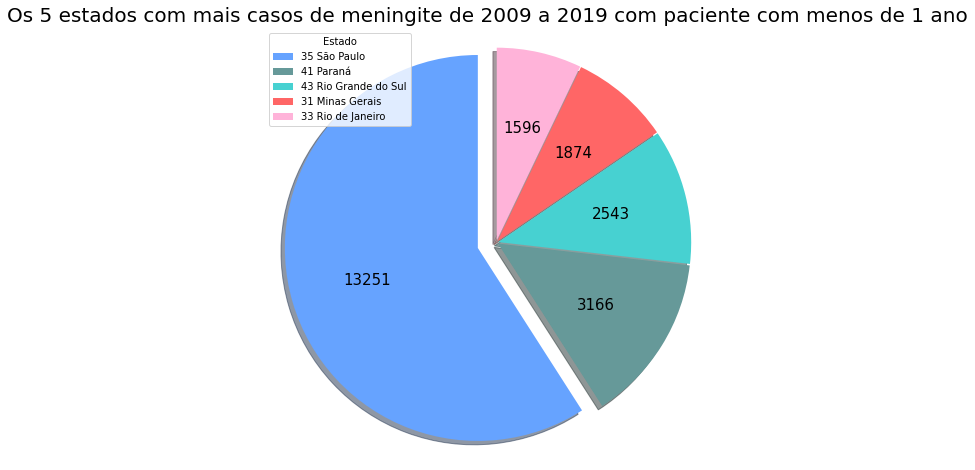

In [10]:
labels = por_idade.loc['35 São Paulo':'33 Rio de Janeiro'].index
values = por_idade.loc['35 São Paulo':'33 Rio de Janeiro'].values


explode = (0.1,0.01,0.01,0.01,0.01)
c = ['#66a3ff', '#669999', '#47d1d1', '#ff6666', '#ffb3d9']
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(values, explode=explode, shadow=True, autopct = autopct_format(values), 
        startangle=90, colors=c, textprops={'fontsize': 15})
ax1.axis('equal')
plt.legend(labels,loc='best', title='Estado')
plt.title('Os 5 estados com mais casos de meningite de 2009 a 2019 com paciente com menos de 1 ano', fontsize=20)
plt.show()